<a href="https://colab.research.google.com/github/BerkayArdaa/ML_HandwrittenDigits_Classification_CNN/blob/main/ML_Homework3_CNN_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === MNIST CNN Homework - EEE 517 ===
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [2]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train images shape :", X_train.shape)
print("Train labels shape :", y_train.shape)
print("Test images shape  :", X_test.shape)
print("Test labels shape  :", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape  : (10000, 28, 28)
Test labels shape  : (10000,)


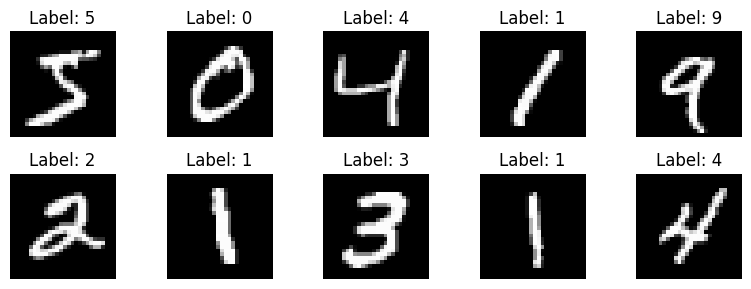

In [3]:
# Showing some sample images from the dataset

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
# Normalize pixel values to [0,1] and reshape for CNN

# Convert from (N, 28, 28) to (N, 28, 28, 1) and scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("New train shape:", X_train.shape)
print("New test shape :", X_test.shape)


New train shape: (60000, 28, 28, 1)
New test shape : (10000, 28, 28, 1)


In [5]:
# Create a small validation set from training data

from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Train subset shape:", X_train_sub.shape, y_train_sub.shape)
print("Validation shape  :", X_val.shape, y_val.shape)
print("Test shape        :", X_test.shape, y_test.shape)


Train subset shape: (54000, 28, 28, 1) (54000,)
Validation shape  : (6000, 28, 28, 1) (6000,)
Test shape        : (10000, 28, 28, 1) (10000,)


In [54]:
# === CNN Model Definition ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#FineTuning attempt_1
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])



model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [83]:
history = model.fit(
    X_train_sub, y_train_sub,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)

print("Validation Accuracy:", max(history.history['val_accuracy']))


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9935 - val_loss: 0.0582
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 9.6135e-04 - val_accuracy: 0.9930 - val_loss: 0.0593
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 7.2064e-04 - val_accuracy: 0.9930 - val_loss: 0.0608
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 9.5588e-04 - val_accuracy: 0.9928 - val_loss: 0.0623
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 8.2816e-04 - val_accuracy: 0.9933 - val_loss: 0.0640
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 8.2035e-04 - val_accuracy: 0.9938 - val_loss: 0.0656
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 5.6274e-04 - val_accuracy: 0.9935 - val_loss: 0.0709
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss:

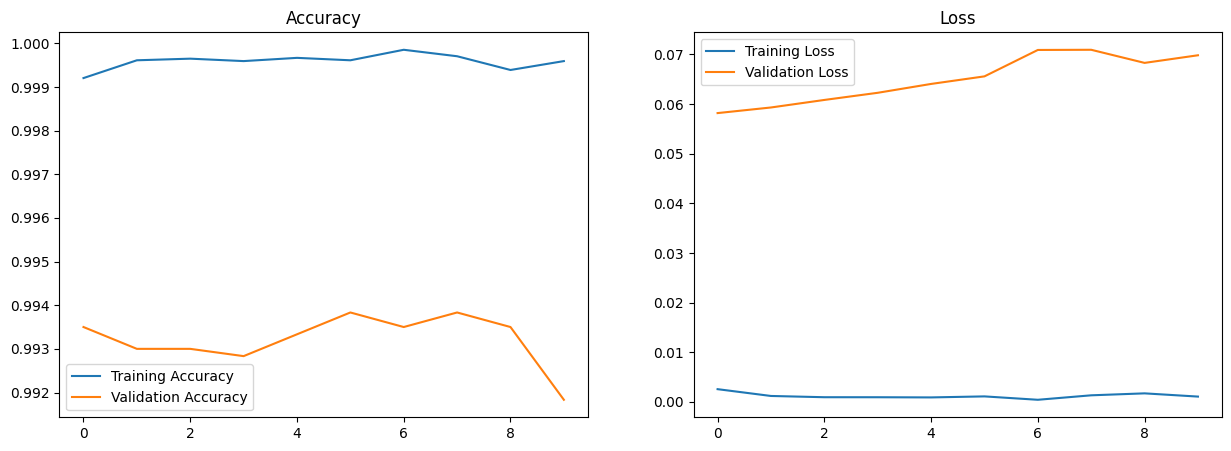

In [84]:
plt.figure(figsize=(15,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# LOSS
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


In [85]:
import os
print(os.listdir("VDataset"))


['indir.png', 'deneme3.jpg', 'numbers.jpg', '.ipynb_checkpoints', 'deneme2.png']


In [86]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("VDataset/deneme3.jpg")

if img is None:
    print("FAILED to load image!")
else:
    print("Image loaded successfully!")


Image loaded successfully!


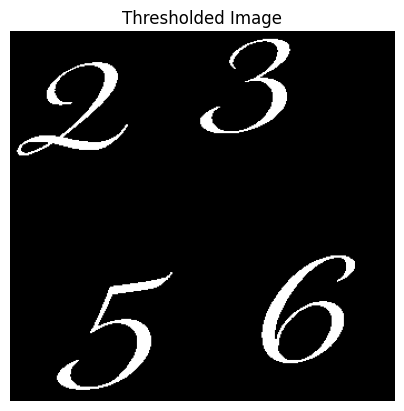

In [87]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binary threshold
_, thresh = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()


In [88]:
contours, _ = cv2.findContours(thresh.copy(),
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)

print("Detected digits:", len(contours))
digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    # Crop region of interest (digit)
    digit = gray[y:y+h, x:x+w]

    # Resize to 28x28
    digit = cv2.resize(digit, (28,28))

    # MNIST = beyaz rakam, siyah arka plan
    digit = 255 - digit

    digit_ready = digit.astype("float32") / 255.0
    digit_ready = digit_ready.reshape(1, 28, 28, 1)

    # Predict
    pred = np.argmax(model.predict(digit_ready))

    digits.append((x, pred, digit))  # sort by x to preserve order

# Sort left ➝ right
digits.sort(key=lambda tup: tup[0])

# Print predictions
print("Predicted digits in order:")
for d in digits:
    print(d[1])


Detected digits: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digits in order:
4
5
5
5


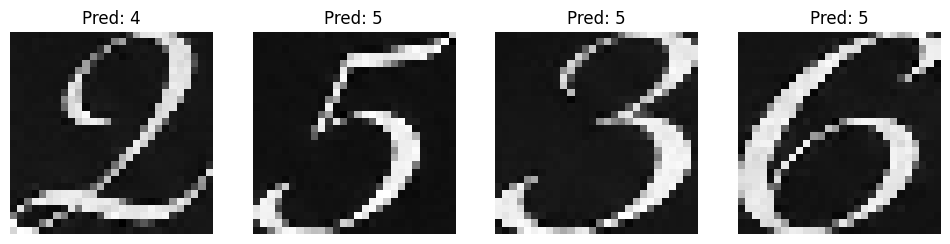

In [89]:
plt.figure(figsize=(12,3))

for i, (x, pred, digit) in enumerate(digits):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(digit, cmap='gray')
    plt.title(f"Pred: {pred}")
    plt.axis("off")

plt.show()
